In [2]:
import pandas as pd
import numpy as np
pd.set_option('float_format', '{:f}'.format)
import datetime as dt
from fbprophet import Prophet

## Export the dataframe for the analyse:

In [3]:
train_ml = pd.read_csv('NEW_Data_Train&Test/train_df_ML.csv')

In [4]:
train_ml.tail()

,building_id,meter,time_serie,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,dew_temperature,month,hour,weekend,day
18476349,920,0,1480528800000000000,122.000000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476350,920,1,1480528800000000000,126.114000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476351,920,2,1480528800000000000,82.350000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476352,921,0,1480528800000000000,494.000000,9,1,12.476722,nan,17.200000,-1.100000,11,18,2,335
18476353,921,1,1480528800000000000,762.981000,9,1,12.476722,nan,17.200000,-1.100000,11,18,2,335


In [5]:
train_ml.dtypes

building_id          int64
meter                int64
time_serie           int64
meter_reading      float64
site_id              int64
primary_use          int64
square_feet        float64
year_built         float64
air_temperature    float64
dew_temperature    float64
month                int64
hour                 int64
weekend              int64
day                  int64
dtype: object

In [6]:
train_ml.time_serie = pd.to_datetime(train_ml.time_serie,format="%Y-%m-%d %H:%M:%S")

In [17]:
train_ml

,building_id,meter,time_serie,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,dew_temperature,month,hour,weekend,day
0,0,0,2016-01-01 00:00:00,0.000000,0,0,8.913685,2008.000000,25.000000,20.000000,1,0,4,1
1,1,0,2016-01-01 00:00:00,0.000000,0,0,7.908755,2004.000000,25.000000,20.000000,1,0,4,1
2,2,0,2016-01-01 00:00:00,0.000000,0,0,8.589886,1991.000000,25.000000,20.000000,1,0,4,1
3,3,0,2016-01-01 00:00:00,0.000000,0,0,10.072639,2002.000000,25.000000,20.000000,1,0,4,1
4,4,0,2016-01-01 00:00:00,0.000000,0,0,11.666573,1975.000000,25.000000,20.000000,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18476349,920,0,2016-11-30 18:00:00,122.000000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476350,920,1,2016-11-30 18:00:00,126.114000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476351,920,2,2016-11-30 18:00:00,82.350000,9,0,11.357721,nan,17.200000,-1.100000,11,18,2,335
18476352,921,0,2016-11-30 18:00:00,494.000000,9,1,12.476722,nan,17.200000,-1.100000,11,18,2,335


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

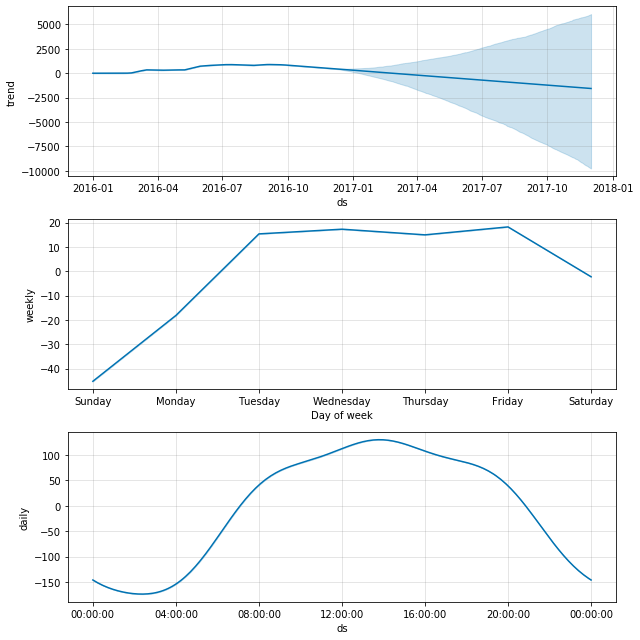

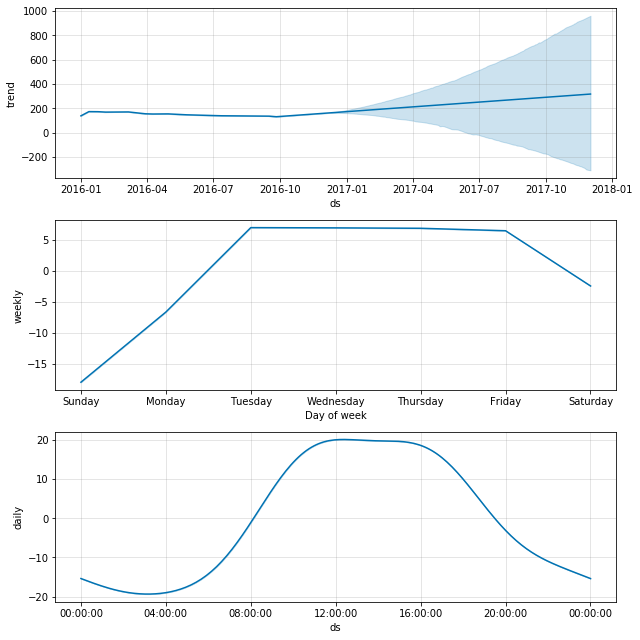

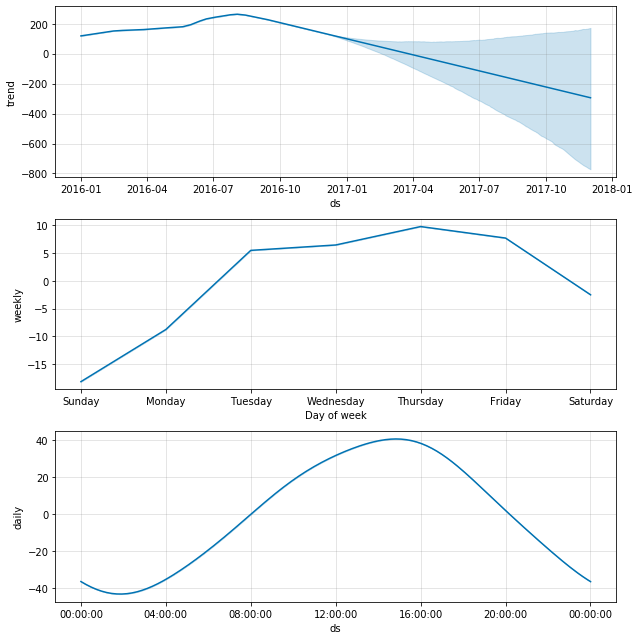

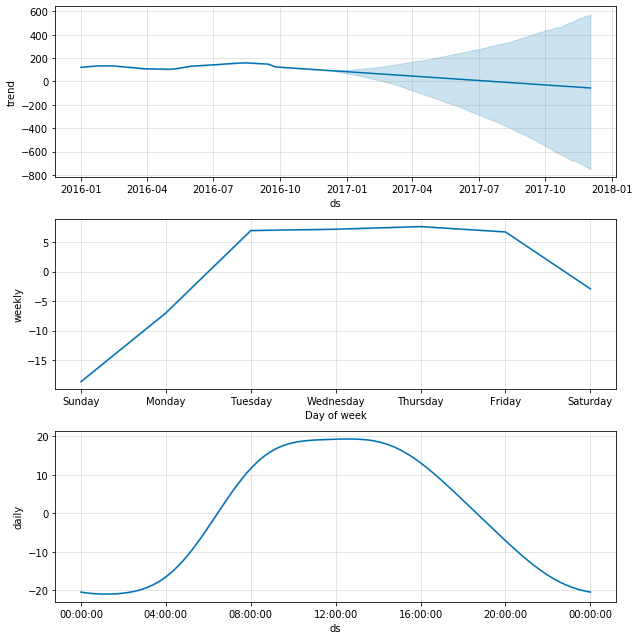

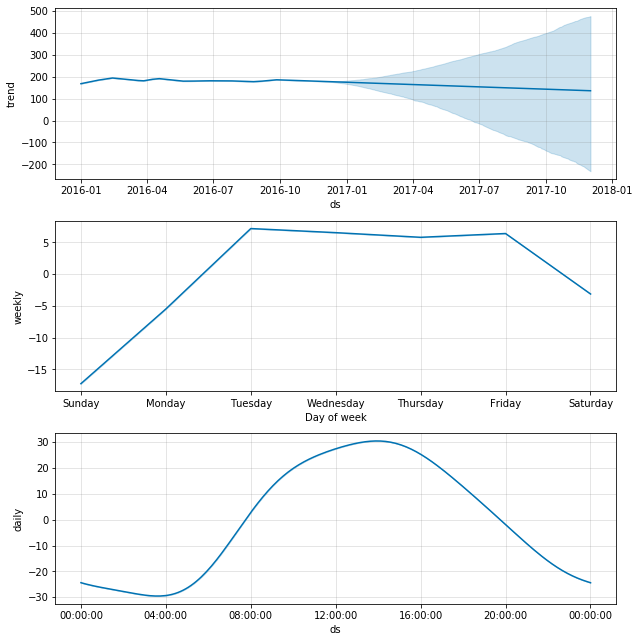

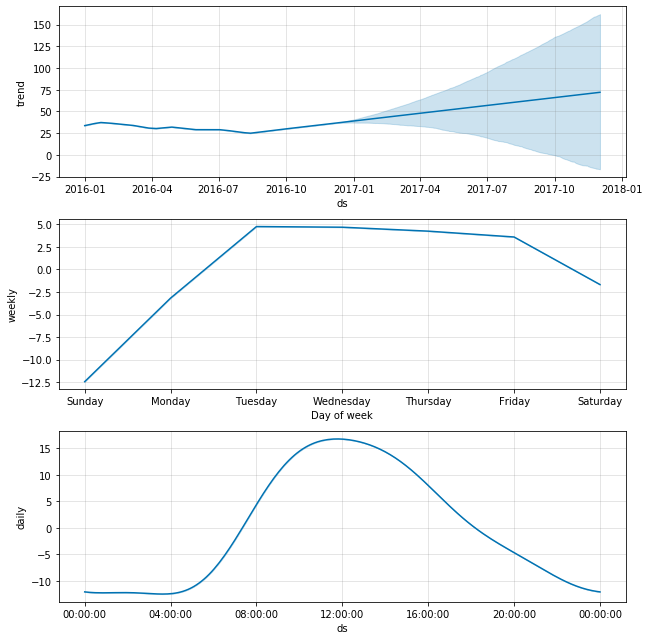

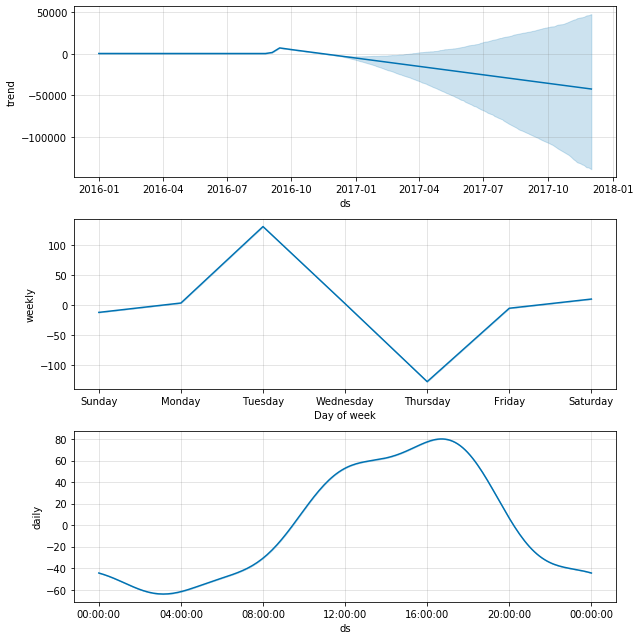

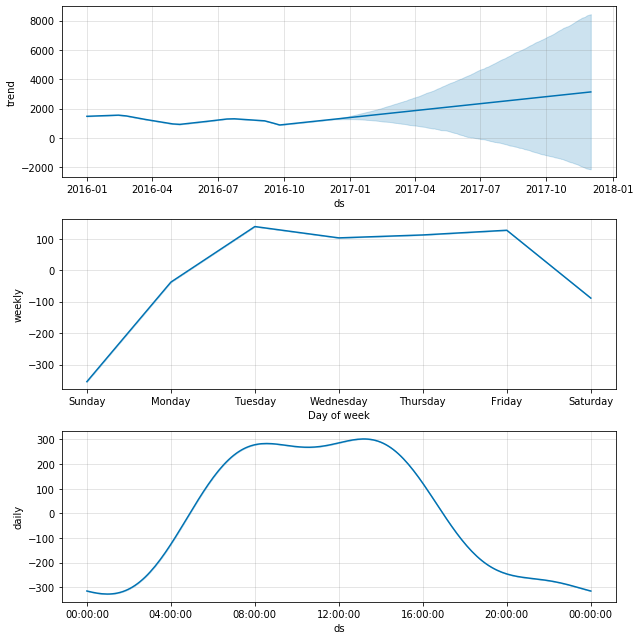

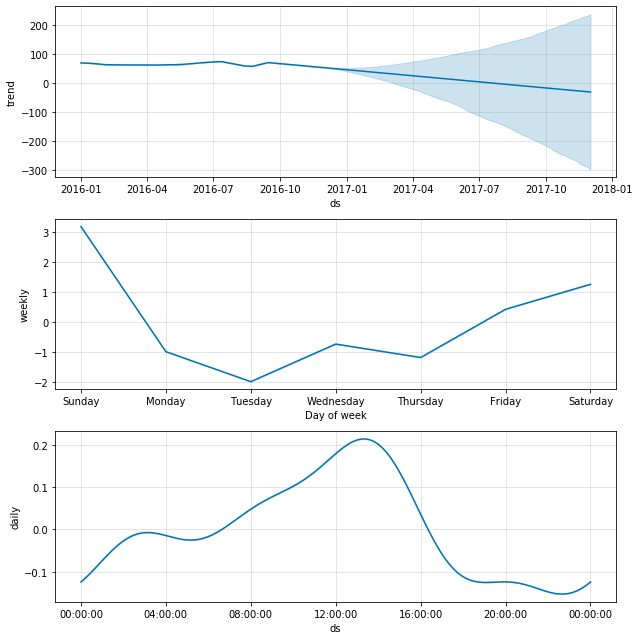

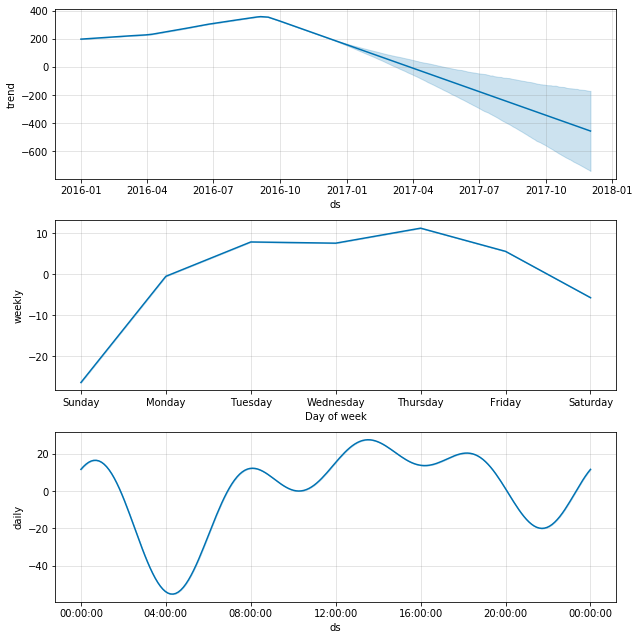

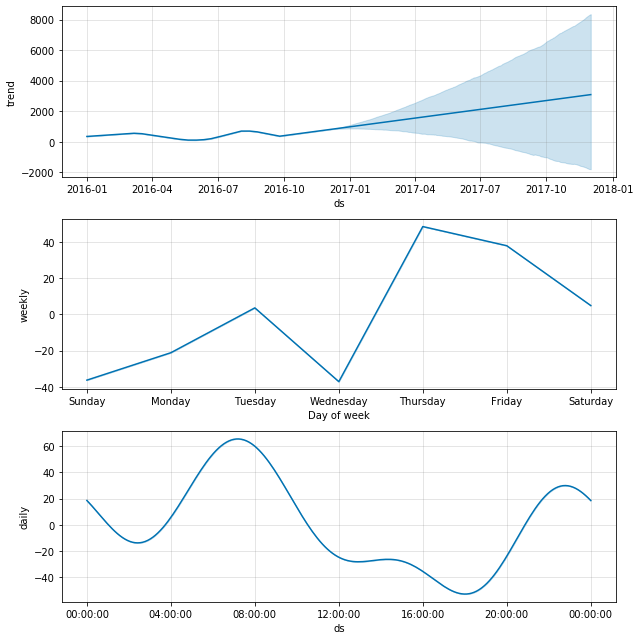

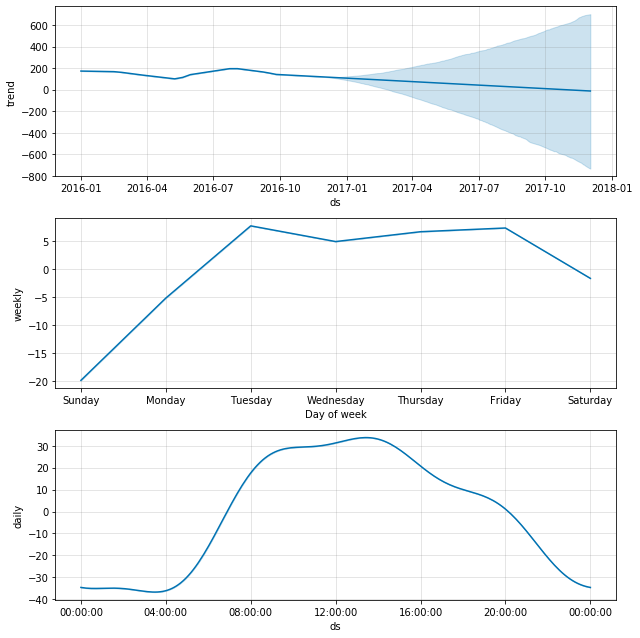

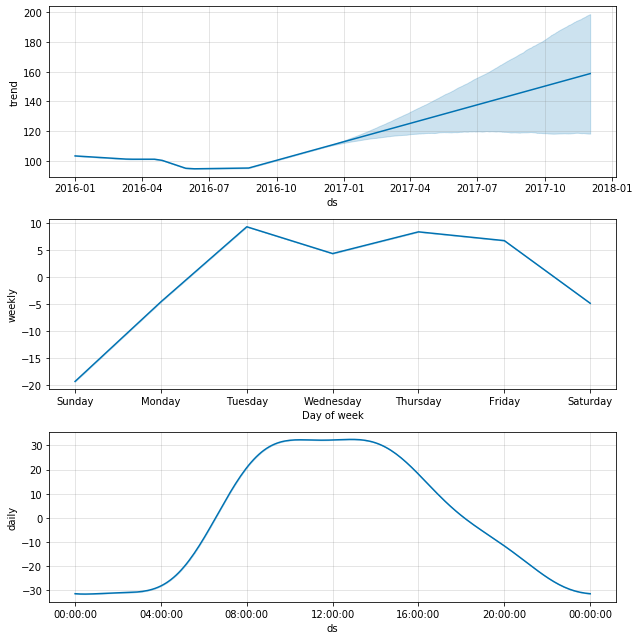

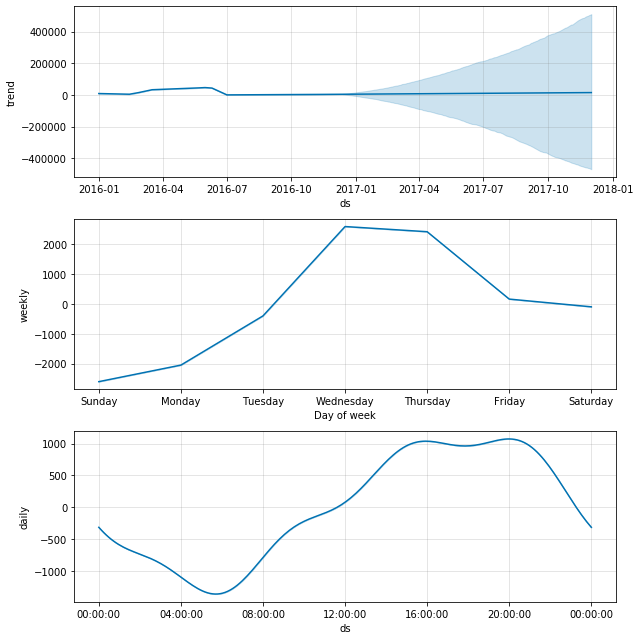

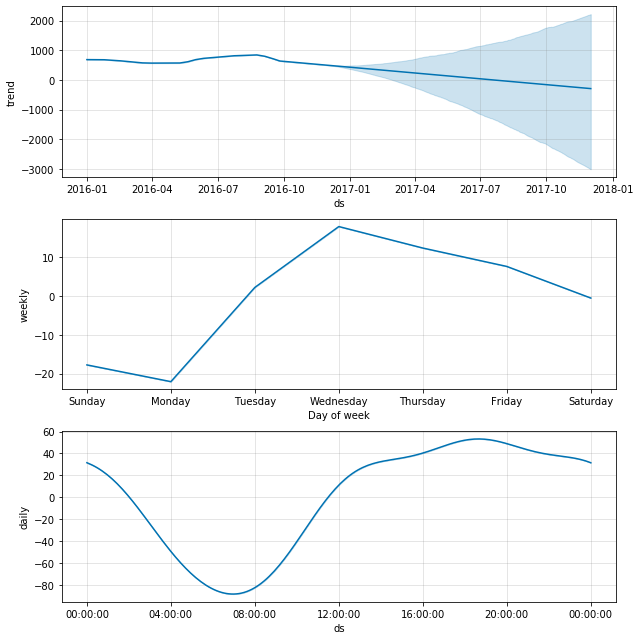

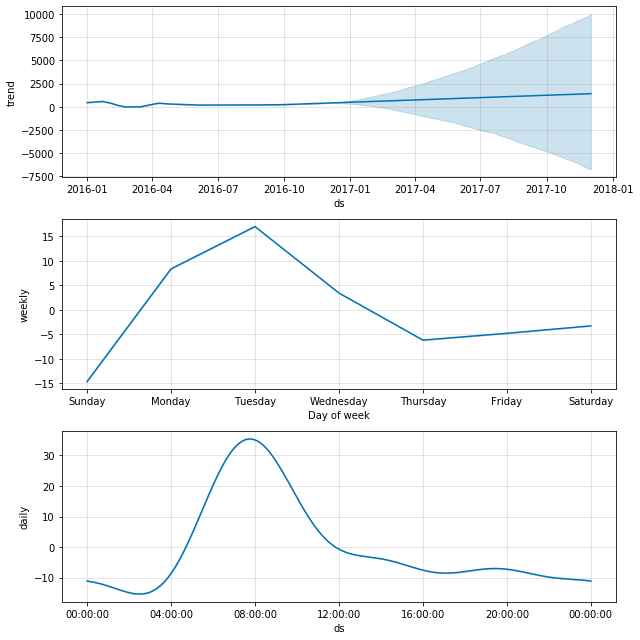

In [22]:
train_df_ml = train_ml.groupby(['site_id', 'time_serie'], as_index = False).mean()

for sites in range(16):
    
    train_futur = train_df_ml.loc[(train_df_ml.site_id) == sites].reset_index(drop=True)
    #train_futur


    train_futur_ml = train_futur[['time_serie','meter_reading']]

    train_futur_ml.rename(columns = {'time_serie':'ds','meter_reading':'y'}, inplace = True)
    #train_futur_ml
    
    # Adding the future prediction for each
    m = Prophet()
    m.fit(train_futur_ml)
    
    future = m.make_future_dataframe(periods=8784,freq='H')

    forecast = m.predict(future)
    
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    fig2 = m.plot_components(forecast)
    

In [ ]:
fig2 = m.plot_components(forecast)